In [18]:
import requests
import json

city = "India"  
api_key = "5741e64b3c0a404b61d6aaa71dcbdc98" 
url = f"https://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Load JSON data from the response
    data = response.json()
    
    # Pretty print the JSON data
    pretty_json = json.dumps(data, indent=4)
    print(pretty_json)
else:
    print(f"Error: {response.status_code}")

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1712080800,
            "main": {
                "temp": 279.15,
                "feels_like": 279.15,
                "temp_min": 271.91,
                "temp_max": 279.15,
                "pressure": 1014,
                "sea_level": 1014,
                "grnd_level": 812,
                "humidity": 57,
                "temp_kf": 7.24
            },
            "weather": [
                {
                    "id": 600,
                    "main": "Snow",
                    "description": "light snow",
                    "icon": "13n"
                }
            ],
            "clouds": {
                "all": 55
            },
            "wind": {
                "speed": 0.87,
                "deg": 14,
                "gust": 0.96
            },
            "visibility": 10000,
            "pop": 1,
            "snow": {
                "3h": 0.2
            },
            "

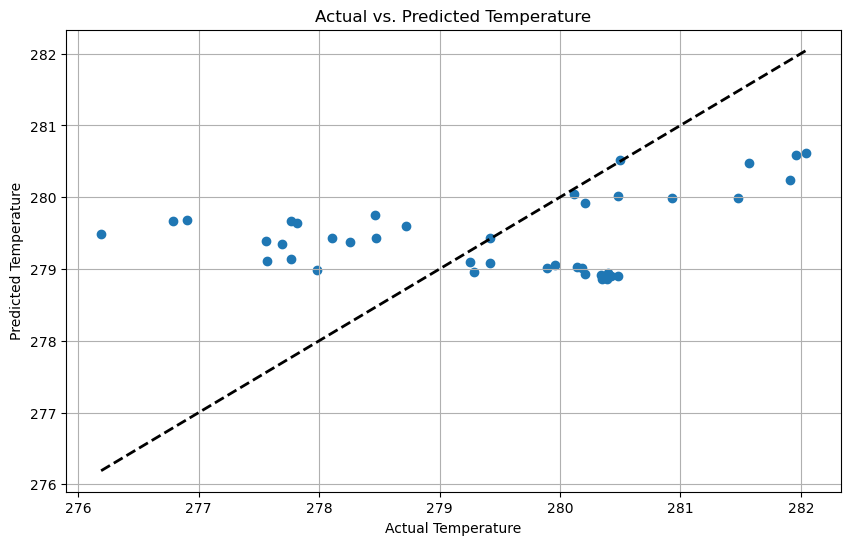

In [19]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

class WeatherData:
    def __init__(self, city):
        self.city = city

    def get_historical_data(self):
        # Fetch historical weather data using an API (e.g., OpenWeatherMap)
        url = f"https://api.openweathermap.org/data/2.5/forecast?q={self.city}&appid=5741e64b3c0a404b61d6aaa71dcbdc98"
        response = requests.get(url)
        if response.status_code == 200:  # Check if the API call was successful
            data = response.json()
            if 'list' in data:  # Check if the expected 'list' key is in the JSON response
                # Extract relevant weather parameters
                dates = [item['dt_txt'] for item in data['list']]
                temperatures = [item['main']['temp'] for item in data['list']]
                humidities = [item['main']['humidity'] for item in data['list']]
                pressures = [item['main']['pressure'] for item in data['list']]
                # Create a pandas DataFrame to store the data
                df = pd.DataFrame({
                    'Date': dates,
                    'Temperature': temperatures,
                    'Humidity': humidities,
                    'Pressure': pressures
                })
                df['Date'] = pd.to_datetime(df['Date'])
                return df
            else:
                print("The 'list' key is not in the response. Here's the full JSON response:")
                print(data)
        else:
            print(f"API call failed with status code {response.status_code}")
        return None  # Ensure that None is returned if the API call fails or 'list' is not in the response
    



class ForecastModel:
    def __init__(self, data):
        self.data = data

    def preprocess_data(self):
        if self.data is not None:  # Check if the data is not None before proceeding
            self.data.dropna(inplace=True)
        else:
            print("No data to preprocess.")



    def train_model(self):
        # Split data into features and target variable
        X = self.data[['Humidity', 'Pressure']]
        y = self.data['Temperature']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        return model

    def plot_predictions(self, model):
        # Plot predicted vs. actual temperature
        predictions = model.predict(self.data[['Humidity', 'Pressure']])
        plt.figure(figsize=(10, 6))
        plt.scatter(self.data['Temperature'], predictions)
        plt.plot([self.data['Temperature'].min(), self.data['Temperature'].max()], 
                 [self.data['Temperature'].min(), self.data['Temperature'].max()], 'k--', lw=2)
        plt.xlabel('Actual Temperature')
        plt.ylabel('Predicted Temperature')
        plt.title('Actual vs. Predicted Temperature')
        plt.grid(True)
        plt.show()

def main():
    # Initialize WeatherData object for a specific city
    city = 'New York'
    weather_data = WeatherData(city)

    # Fetch historical weather data
    historical_data = weather_data.get_historical_data()

    # Initialize ForecastModel object with the historical data
    forecast_model = ForecastModel(historical_data)

    # Preprocess the data
    forecast_model.preprocess_data()

    # Train the forecasting model
    model = forecast_model.train_model()

    # Plot the predictions
    forecast_model.plot_predictions(model)

if __name__ == "__main__":
    main()
